## Семинар 7 - Нейросети

In [ ]:
!pip install torch torchvision

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
# warnings.simplefilter('ignore')
import torch
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
print(torch.__version__)

1.7.0+cu101


# 1. Вспомним PyTorch

Эта часть основана на материалах курса [dlschool](https://www.dlschool.org/)

Нахождение сложной производной

Найдите производную по x от функции 
$$\sin\left(\tan(x)\frac{x^2}{y} + \ln(e^{-x^2 + 3}+x^3y)\right)\tan(x^2e^{x^9})$$

При этом надо пользоваться встроенным в PyTorch autograd. Численное вычисление производной может не дать нужный результат.

In [ ]:
def find_x_derivative(x, y):
    # Ваш код здесь
    x = torch.tensor([x], dtype=float, requires_grad=True)
    y = torch.tensor([y], dtype=float, requires_grad=True)
    z = (x.tan()*x*x/y + ((-x*x+3).exp()+y*x**3).log()).sin()*((x**9).exp()*x*x).tan()
    z.backward()
    return x.grad

In [ ]:
find_x_derivative(1,21)

tensor([-9.0207], dtype=torch.float64)

Нахождение косинусной близости

Вам даны две матрицы A и B. Необходимо посчитать косинусную близость между строчками матрицы A и столбцами матрицы B. Ответ - матрица чисел, где номер строки - номер строки из матрицы А, а номер столбца - номер столбца из В, от которых бралась косинусная близость.

Напомним, что косинусная близость двух векторов - косинус угла между ними. В n-мерном пространстве косинус угла между веткорами удобнее всего через скалярное произведение:
$$\cos(angle(x, y)) = \frac{x \cdot y}{\left\|x\right\| \left\|y\right\|}$$


In [ ]:
def get_cos_sim(A, B):
    """
        A, B - torch float tensors
    """
    # Ваш код здесь
    A = torch.tensor(A, dtype = torch.float)
    B = torch.tensor(B, dtype = torch.float)

    res = A @ B / (torch.norm(A, dim=1, keepdim=True) @ torch.norm(B, dim=0, keepdim=True))
    
    return res

In [ ]:
A = [[1, -47, 25, -3], [10, 17, -15, 22], [-3, -7, 26, 36], [12, -27, -42, 0]]
B = [[-50, -13, 1, 10, 1242], [21, 48, -13, -14, -20], [20, 15, 11, 43, 11], [11, 103, 147, 27, -8]]

In [ ]:
torch.mean(get_cos_sim(A, B))

tensor(0.1498)

# Практика: Погружение в глубокое обучение
В семинаре, будем использовать набор данных `fashion_mnist`, загрузим их

In [ ]:
from torchvision import datasets,transforms

In [ ]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = True, download=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw




Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = False, download = True)

In [ ]:
num_classes = len(trainset.classes)

In [ ]:
trainset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
x_train = trainset.train_data
y_train = trainset.train_labels

x_test = testset.train_data
y_test = testset.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
x_test

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

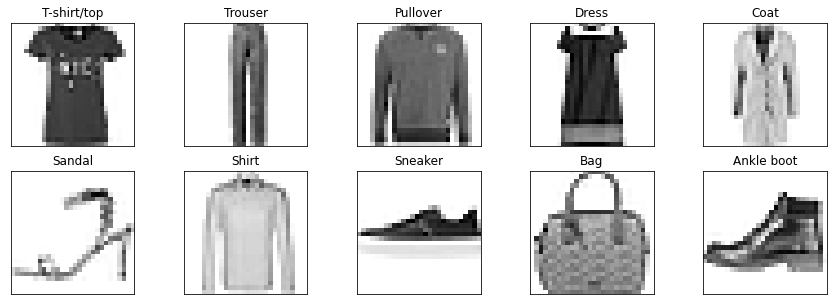

In [ ]:
fig = plt.figure(figsize=(15,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(trainset.classes[i])
    plt.imshow(im, cmap='gray_r')
plt.show()

### Проведем небольшие предобработки

In [ ]:
x_train_flat = x_train.flatten(start_dim=1).float()
x_test_flat = x_test.flatten(start_dim=1).float()
print(f'Была размерность: {x_train.shape}, стала: {x_train_flat.shape}')
print(f'Была размерность: {x_test.shape}, стала: {x_test_flat.shape}')

Была размерность: torch.Size([60000, 28, 28]), стала: torch.Size([60000, 784])
Была размерность: torch.Size([10000, 28, 28]), стала: torch.Size([10000, 784])


In [ ]:
D_out =  num_classes# Ваш код здесь
D_in = x_train_flat.shape[1]

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, 128),
    torch.nn.Sigmoid(),
    torch.nn.Linear(128, 10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10, D_out),
    torch.nn.Softmax(dim=1)
)

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = torch.nn.Linear(D_in, 128)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(128, 10)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(10, D_out)
        self.act3 = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

model = Model()

In [ ]:
model

Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (act3): Softmax(dim=1)
)

In [ ]:
# Forward pass: compute predicted y by passing x to the model. Module objects
# override the __call__ operator so you can call them like functions. When
# doing so you pass a Tensor of input data to the Module and it produces
# a Tensor of output data.
y_pred = model(x_train_flat)

In [ ]:
y_pred.shape

torch.Size([60000, 10])

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# Compute and print loss. We pass Tensors containing the predicted and true
# values of y, and the loss function returns a Tensor containing the
# loss.
loss_old = loss_fn(y_pred, y_train)

In [ ]:
loss_old

tensor(2.3040, grad_fn=<NllLossBackward>)

In [ ]:
acc_old = accuracy_score(y_train.numpy(), y_pred.argmax(dim=1).numpy())

In [ ]:
acc_old

0.1

In [ ]:
# Zero the gradients before running the backward pass.
model.zero_grad()

In [ ]:
# Backward pass: compute gradient of the loss with respect to all the learnable
# parameters of the model. Internally, the parameters of each Module are stored
# in Tensors with requires_grad=True, so this call will compute gradients for
# all learnable parameters in the model.
loss_old.backward()

In [ ]:
learning_rate = 1e-2

In [ ]:
# Update the weights using gradient descent. Each parameter is a Tensor, so
# we can access its gradients like we did before.
with torch.no_grad():
  # Ваш код здесь
  for param in model.parameters():
    param -= learning_rate*param.grad

In [ ]:
y_pred = model(x_train_flat.float())
loss_new = loss_fn(y_pred, y_train)
step = loss_new.item()-loss_old.item()

acc_new = accuracy_score(y_train.numpy(), y_pred.argmax(dim=1).numpy())



print(f'Лосс: {loss_old.item()} -> {loss_new.item()}. Step {step} ')
print(f'Accuracy: {acc_old} -> {acc_new}')

Лосс: 2.3040177822113037 -> 2.3039395809173584. Step -7.82012939453125e-05 
Accuracy: 0.1 -> 0.1


In [ ]:
def batch_train(model, loss_fn, learning_rate, x, y):
  # Ваш код здесь
    pred = model(x)
    loss = loss_fn(pred, y)
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
          param -= learning_rate*param.grad
    return(loss.item())

In [ ]:
def train(model, n_epochs, batch_size, learning_rate,  X, y, X_test, y_test):
    acc_train_all = []
    loss_train_all = []
    acc_test_all = []
    loss_test_all = []

    for epoch in range(n_epochs):

        permutation = torch.randperm(X.size()[0])

        for i in tqdm(range(0,X.float().size()[0], batch_size)):
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = X[indices], y[indices]
            batch_train(model, loss_fn, learning_rate, batch_x, batch_y)

        y_test_pred = model(X_test)
        y_train_pred = model(X)


        acc_train = accuracy_score(y.numpy(), y_train_pred.argmax(dim=1).numpy())
        loss_train = loss_fn(y_train_pred, y).detach().numpy() 
        acc_test = accuracy_score(y_test.numpy(), y_test_pred.argmax(dim=1).numpy())
        loss_test = loss_fn(y_test_pred, y_test).detach().numpy()

        acc_train_all = np.append(acc_train_all, acc_train)
        loss_train_all = np.append(loss_train_all, loss_train)
        acc_test_all = np.append(acc_test_all, acc_test)
        loss_test_all = np.append(loss_test_all, loss_test)


        print(f'Epoch {epoch}: \n Accuracy - train: {acc_train} | test: {acc_test} \n Loss - train: {loss_train} | test: {loss_test}')
        
    return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

In [ ]:
n_epochs = 10
batch_size = 1000 
learning_rate = 1e-1

acc_train_all, loss_train_all, acc_test_all, loss_test_all = \
          train(model, n_epochs, batch_size, learning_rate, x_train_flat, y_train, x_test_flat, y_test)


  7%|▋         | 4/60 [00:00<00:01, 32.46it/s]

Epoch 0: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.2945568561553955 | test: 2.294584274291992


  7%|▋         | 4/60 [00:00<00:01, 30.60it/s]

Epoch 1: 
 Accuracy - train: 0.11643333333333333 | test: 0.1168 
 Loss - train: 2.2891409397125244 | test: 2.2892038822174072


  5%|▌         | 3/60 [00:00<00:02, 27.47it/s]

Epoch 2: 
 Accuracy - train: 0.15306666666666666 | test: 0.1542 
 Loss - train: 2.2836720943450928 | test: 2.2836952209472656


  5%|▌         | 3/60 [00:00<00:02, 26.59it/s]

Epoch 3: 
 Accuracy - train: 0.12286666666666667 | test: 0.124 
 Loss - train: 2.2774293422698975 | test: 2.2773165702819824


  5%|▌         | 3/60 [00:00<00:02, 26.03it/s]

Epoch 4: 
 Accuracy - train: 0.10291666666666667 | test: 0.1024 
 Loss - train: 2.270002841949463 | test: 2.2700066566467285


  5%|▌         | 3/60 [00:00<00:02, 26.02it/s]

Epoch 5: 
 Accuracy - train: 0.10043333333333333 | test: 0.1 
 Loss - train: 2.2621560096740723 | test: 2.262186050415039


  5%|▌         | 3/60 [00:00<00:02, 24.76it/s]

Epoch 6: 
 Accuracy - train: 0.113 | test: 0.114 
 Loss - train: 2.2542545795440674 | test: 2.2543530464172363


  5%|▌         | 3/60 [00:00<00:02, 25.42it/s]

Epoch 7: 
 Accuracy - train: 0.2227 | test: 0.2239 
 Loss - train: 2.2469358444213867 | test: 2.2466838359832764


  5%|▌         | 3/60 [00:00<00:02, 26.84it/s]

Epoch 8: 
 Accuracy - train: 0.26885 | test: 0.2667 
 Loss - train: 2.239611864089966 | test: 2.239499807357788


100%|██████████| 60/60 [00:02<00:00, 25.22it/s]


Epoch 9: 
 Accuracy - train: 0.2662833333333333 | test: 0.2658 
 Loss - train: 2.232842445373535 | test: 2.2328901290893555


In [ ]:
def vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all):
    fig = plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)

    plt.plot(loss_train_all, label='loss')
    plt.plot(loss_test_all, label='val_loss')

    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc_train_all, label='acc')
    plt.plot(acc_test_all, label='val_acc')

    plt.legend()
    plt.show()

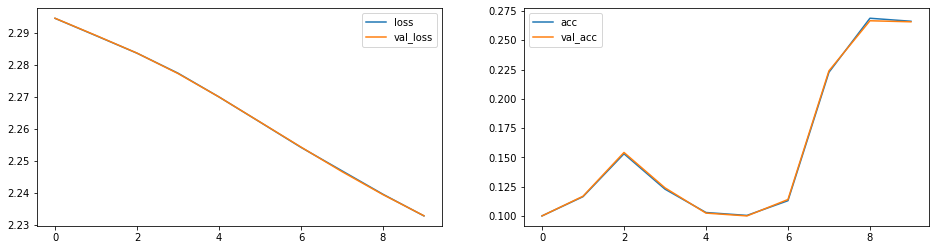

In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

## Что мы можем улучшить? 
- Отнормировать признаки
- Заменить сигмоиды на ReLu
- Задать правила инициации весов

### Нормировка
![picture](https://drive.google.com/uc?export=view&id=1cZ12oLwDToKVev2bdTvzzNoFVOU_jKYn)

In [ ]:
# Ваш код здесь
x_train_norm = (x_train_flat - x_train_flat.mean())/x_train_flat.std()**(1/2)
x_test_norm = (x_test_flat - x_test_flat.mean())/x_test_flat.std()**(1/2)

In [ ]:
x_train_norm.max(), x_train_norm.min()

(tensor(19.1885), tensor(-7.6877))

In [ ]:
n_epochs = 10
batch_size = 2028 
learning_rate = 1e-2

acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model, n_epochs, batch_size, learning_rate,
                                                                   x_train_norm, y_train, x_test_norm, y_test)


 20%|██        | 6/30 [00:00<00:00, 51.71it/s]

Epoch 0: 
 Accuracy - train: 0.15793333333333334 | test: 0.159 
 Loss - train: 2.247319459915161 | test: 2.2471587657928467


 23%|██▎       | 7/30 [00:00<00:00, 60.69it/s]

Epoch 1: 
 Accuracy - train: 0.16843333333333332 | test: 0.1679 
 Loss - train: 2.245569944381714 | test: 2.2454633712768555


 23%|██▎       | 7/30 [00:00<00:00, 61.33it/s]

Epoch 2: 
 Accuracy - train: 0.17633333333333334 | test: 0.1752 
 Loss - train: 2.24402117729187 | test: 2.2440061569213867


 23%|██▎       | 7/30 [00:00<00:00, 61.33it/s]

Epoch 3: 
 Accuracy - train: 0.18318333333333334 | test: 0.184 
 Loss - train: 2.2426881790161133 | test: 2.2427287101745605


 20%|██        | 6/30 [00:00<00:00, 56.02it/s]

Epoch 4: 
 Accuracy - train: 0.1892 | test: 0.19 
 Loss - train: 2.2415192127227783 | test: 2.2415931224823


 20%|██        | 6/30 [00:00<00:00, 54.80it/s]

Epoch 5: 
 Accuracy - train: 0.194 | test: 0.1951 
 Loss - train: 2.2404568195343018 | test: 2.240562915802002


 23%|██▎       | 7/30 [00:00<00:00, 61.34it/s]

Epoch 6: 
 Accuracy - train: 0.19805 | test: 0.1995 
 Loss - train: 2.239529848098755 | test: 2.239622116088867


 23%|██▎       | 7/30 [00:00<00:00, 61.05it/s]

Epoch 7: 
 Accuracy - train: 0.20195 | test: 0.2026 
 Loss - train: 2.2386560440063477 | test: 2.2387537956237793


 20%|██        | 6/30 [00:00<00:00, 58.29it/s]

Epoch 8: 
 Accuracy - train: 0.20516666666666666 | test: 0.207 
 Loss - train: 2.2378532886505127 | test: 2.237947940826416


100%|██████████| 30/30 [00:00<00:00, 59.80it/s]


Epoch 9: 
 Accuracy - train: 0.20735 | test: 0.2091 
 Loss - train: 2.2371175289154053 | test: 2.237196207046509


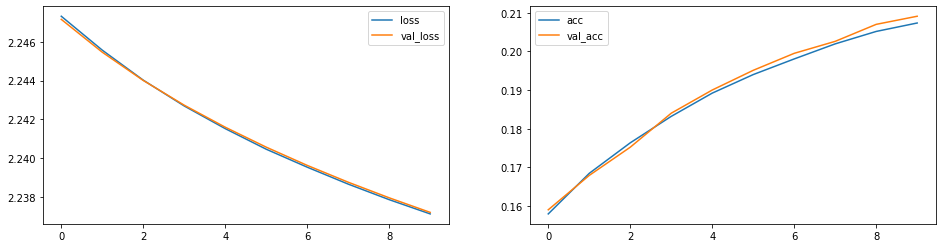

In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

### Инициациия весов
__Случайно__  
$ w = a * random$, но тогда если $a \gg 1$, то на выходе $b\gg1$ и если $a \ll 1 $, то $b \approx 0 $  

__Xavier__  
$a = \frac{1}{\sqrt{n}}$, где $n$ - кол-во нейронов на входе

__He__  
$a = \frac{1}{\sqrt{\frac{n}{2}}}$, где $n$ - кол-во нейронов на входе

In [ ]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

Примените к модели  функцию инициации весов с помощью метода .apply()

In [ ]:
model_2 =  model.apply(init_weights)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
n_epochs = 10
batch_size = 2028 
learning_rate = 1e-2

acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model_2, n_epochs, batch_size, learning_rate,
                                                                   x_train_norm, y_train, x_test_norm, y_test)


 23%|██▎       | 7/30 [00:00<00:00, 61.95it/s]

Epoch 0: 
 Accuracy - train: 0.13451666666666667 | test: 0.1324 
 Loss - train: 2.300945281982422 | test: 2.3009955883026123


 23%|██▎       | 7/30 [00:00<00:00, 62.05it/s]

Epoch 1: 
 Accuracy - train: 0.14956666666666665 | test: 0.1466 
 Loss - train: 2.29925274848938 | test: 2.2993271350860596


 23%|██▎       | 7/30 [00:00<00:00, 61.49it/s]

Epoch 2: 
 Accuracy - train: 0.16263333333333332 | test: 0.1597 
 Loss - train: 2.297555685043335 | test: 2.2976760864257812


 20%|██        | 6/30 [00:00<00:00, 59.50it/s]

Epoch 3: 
 Accuracy - train: 0.17661666666666667 | test: 0.1742 
 Loss - train: 2.2958884239196777 | test: 2.296017646789551


 23%|██▎       | 7/30 [00:00<00:00, 61.79it/s]

Epoch 4: 
 Accuracy - train: 0.19265 | test: 0.1895 
 Loss - train: 2.2942323684692383 | test: 2.2943732738494873


 23%|██▎       | 7/30 [00:00<00:00, 61.98it/s]

Epoch 5: 
 Accuracy - train: 0.20913333333333334 | test: 0.206 
 Loss - train: 2.2925963401794434 | test: 2.2927534580230713


 23%|██▎       | 7/30 [00:00<00:00, 62.06it/s]

Epoch 6: 
 Accuracy - train: 0.22588333333333332 | test: 0.2238 
 Loss - train: 2.2909979820251465 | test: 2.291161298751831


 23%|██▎       | 7/30 [00:00<00:00, 61.25it/s]

Epoch 7: 
 Accuracy - train: 0.24183333333333334 | test: 0.242 
 Loss - train: 2.289417028427124 | test: 2.2895843982696533


 20%|██        | 6/30 [00:00<00:00, 59.38it/s]

Epoch 8: 
 Accuracy - train: 0.25515 | test: 0.2563 
 Loss - train: 2.287872552871704 | test: 2.2880337238311768


100%|██████████| 30/30 [00:00<00:00, 61.94it/s]


Epoch 9: 
 Accuracy - train: 0.26645 | test: 0.2673 
 Loss - train: 2.286358594894409 | test: 2.2865021228790283


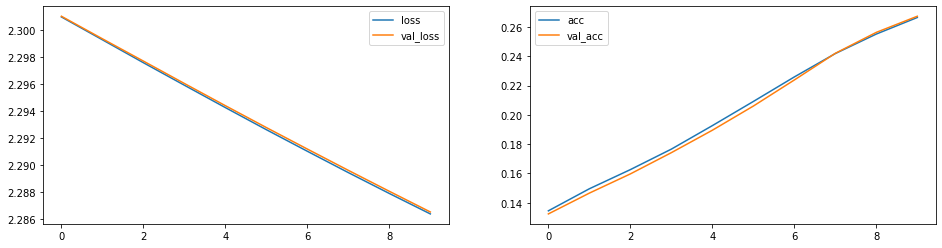

In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

### Функции активации
![picture](https://drive.google.com/uc?export=view&id=1E-p46g_GUEV4Z87-Ys9pwIn8_ZvyZW0s)

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = torch.nn.Linear(D_in, 128)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(128, 10)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(10, D_out)
        self.act3 = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

model_3 = Model()

In [ ]:
n_epochs = 20
batch_size = 2028 
learning_rate = 1e-2

acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model_3, n_epochs, batch_size, learning_rate,
                                                                   x_train_norm, y_train, x_test_norm, y_test)


 23%|██▎       | 7/30 [00:00<00:00, 62.69it/s]

Epoch 0: 
 Accuracy - train: 0.24691666666666667 | test: 0.2416 
 Loss - train: 2.229109048843384 | test: 2.231144666671753


 23%|██▎       | 7/30 [00:00<00:00, 63.11it/s]

Epoch 1: 
 Accuracy - train: 0.3783166666666667 | test: 0.3756 
 Loss - train: 2.127223253250122 | test: 2.1302947998046875


 23%|██▎       | 7/30 [00:00<00:00, 62.22it/s]

Epoch 2: 
 Accuracy - train: 0.4729 | test: 0.4703 
 Loss - train: 2.043544292449951 | test: 2.0474960803985596


 23%|██▎       | 7/30 [00:00<00:00, 62.54it/s]

Epoch 3: 
 Accuracy - train: 0.5333166666666667 | test: 0.5323 
 Loss - train: 1.9712369441986084 | test: 1.975189447402954


 23%|██▎       | 7/30 [00:00<00:00, 62.22it/s]

Epoch 4: 
 Accuracy - train: 0.5484833333333333 | test: 0.5455 
 Loss - train: 1.9449007511138916 | test: 1.9494554996490479


 23%|██▎       | 7/30 [00:00<00:00, 62.77it/s]

Epoch 5: 
 Accuracy - train: 0.55665 | test: 0.5522 
 Loss - train: 1.9302496910095215 | test: 1.9352293014526367


 23%|██▎       | 7/30 [00:00<00:00, 63.23it/s]

Epoch 6: 
 Accuracy - train: 0.5614166666666667 | test: 0.556 
 Loss - train: 1.9204199314117432 | test: 1.925648808479309


 23%|██▎       | 7/30 [00:00<00:00, 60.91it/s]

Epoch 7: 
 Accuracy - train: 0.5652666666666667 | test: 0.5609 
 Loss - train: 1.9131823778152466 | test: 1.9186179637908936


 23%|██▎       | 7/30 [00:00<00:00, 60.74it/s]

Epoch 8: 
 Accuracy - train: 0.56875 | test: 0.5642 
 Loss - train: 1.9074069261550903 | test: 1.9130820035934448


 23%|██▎       | 7/30 [00:00<00:00, 58.72it/s]

Epoch 9: 
 Accuracy - train: 0.57175 | test: 0.5647 
 Loss - train: 1.902782678604126 | test: 1.9086323976516724


 23%|██▎       | 7/30 [00:00<00:00, 62.75it/s]

Epoch 10: 
 Accuracy - train: 0.5750833333333333 | test: 0.5671 
 Loss - train: 1.8989704847335815 | test: 1.9050521850585938


 23%|██▎       | 7/30 [00:00<00:00, 62.82it/s]

Epoch 11: 
 Accuracy - train: 0.5774166666666667 | test: 0.5675 
 Loss - train: 1.8956243991851807 | test: 1.9018994569778442


 23%|██▎       | 7/30 [00:00<00:00, 60.67it/s]

Epoch 12: 
 Accuracy - train: 0.5793 | test: 0.5689 
 Loss - train: 1.8927732706069946 | test: 1.8993101119995117


 23%|██▎       | 7/30 [00:00<00:00, 62.74it/s]

Epoch 13: 
 Accuracy - train: 0.5809333333333333 | test: 0.5702 
 Loss - train: 1.8902453184127808 | test: 1.8969417810440063


 23%|██▎       | 7/30 [00:00<00:00, 61.81it/s]

Epoch 14: 
 Accuracy - train: 0.58215 | test: 0.5714 
 Loss - train: 1.8880202770233154 | test: 1.8948745727539062


 23%|██▎       | 7/30 [00:00<00:00, 60.38it/s]

Epoch 15: 
 Accuracy - train: 0.5835166666666667 | test: 0.5723 
 Loss - train: 1.8859448432922363 | test: 1.8929835557937622


 23%|██▎       | 7/30 [00:00<00:00, 61.55it/s]

Epoch 16: 
 Accuracy - train: 0.58455 | test: 0.5739 
 Loss - train: 1.8841822147369385 | test: 1.8912209272384644


 23%|██▎       | 7/30 [00:00<00:00, 61.35it/s]

Epoch 17: 
 Accuracy - train: 0.5856 | test: 0.5749 
 Loss - train: 1.8824512958526611 | test: 1.8897367715835571


 23%|██▎       | 7/30 [00:00<00:00, 62.73it/s]

Epoch 18: 
 Accuracy - train: 0.5865833333333333 | test: 0.5757 
 Loss - train: 1.8808845281600952 | test: 1.8883417844772339


100%|██████████| 30/30 [00:00<00:00, 63.04it/s]


Epoch 19: 
 Accuracy - train: 0.5874666666666667 | test: 0.5767 
 Loss - train: 1.879498839378357 | test: 1.886940598487854


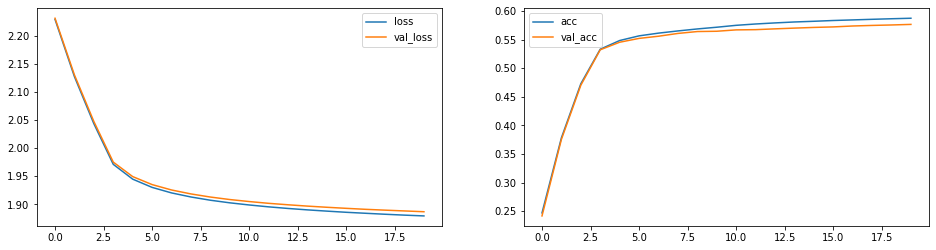

In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

## Влияние скорости обучения
Посмотрим, как влияет параметр `learning_rate` на качество нашей модели на обучающей выборке

In [ ]:
learning_rates = [1e+1, 1e-2, 1e-3, 1e-5, 1e-10] 

In [ ]:
voc_loss_train = {}
batch_size = 5000

for i in learning_rates:
    model_3.apply(init_weights)
    acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model_3, 25, batch_size, i,
                                                                       x_train_flat, y_train, x_test_flat, y_test)
    voc_loss_train[i] = loss_train_all

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until
 25%|██▌       | 3/12 [00:00<00:00, 24.62it/s]

Epoch 0: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.14it/s]

Epoch 1: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.36it/s]

Epoch 2: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.42it/s]

Epoch 3: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 24.76it/s]

Epoch 4: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.35it/s]

Epoch 5: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.53it/s]

Epoch 6: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.19it/s]

Epoch 7: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.48it/s]

Epoch 8: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.32it/s]

Epoch 9: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 24.68it/s]

Epoch 10: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.06it/s]

Epoch 11: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.09it/s]

Epoch 12: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 24.47it/s]

Epoch 13: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 24.54it/s]

Epoch 14: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.15it/s]

Epoch 15: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.59it/s]

Epoch 16: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.14it/s]

Epoch 17: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.18it/s]

Epoch 18: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.84it/s]

Epoch 19: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 24.53it/s]

Epoch 20: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.83it/s]

Epoch 21: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.92it/s]

Epoch 22: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 25%|██▌       | 3/12 [00:00<00:00, 25.47it/s]

Epoch 23: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 17%|█▋        | 2/12 [00:00<00:00, 12.17it/s]

Epoch 24: 
 Accuracy - train: 0.1 | test: 0.1 
 Loss - train: 2.3615291118621826 | test: 2.3609778881073


 17%|█▋        | 2/12 [00:00<00:00, 11.47it/s]

Epoch 0: 
 Accuracy - train: 0.21993333333333334 | test: 0.2225 
 Loss - train: 2.2390122413635254 | test: 2.2364962100982666


 17%|█▋        | 2/12 [00:00<00:00, 12.44it/s]

Epoch 1: 
 Accuracy - train: 0.2839 | test: 0.2851 
 Loss - train: 2.1750123500823975 | test: 2.1742045879364014


  8%|▊         | 1/12 [00:00<00:01,  8.56it/s]

Epoch 2: 
 Accuracy - train: 0.3390666666666667 | test: 0.3386 
 Loss - train: 2.1203222274780273 | test: 2.1208202838897705


  8%|▊         | 1/12 [00:00<00:01,  7.80it/s]

Epoch 3: 
 Accuracy - train: 0.3647166666666667 | test: 0.3613 
 Loss - train: 2.095201253890991 | test: 2.0983784198760986


  8%|▊         | 1/12 [00:00<00:01,  7.72it/s]

Epoch 4: 
 Accuracy - train: 0.3784166666666667 | test: 0.3741 
 Loss - train: 2.0815610885620117 | test: 2.085062026977539


  8%|▊         | 1/12 [00:00<00:01,  7.17it/s]

Epoch 5: 
 Accuracy - train: 0.38953333333333334 | test: 0.3879 
 Loss - train: 2.0705208778381348 | test: 2.072230100631714


  8%|▊         | 1/12 [00:00<00:01,  7.39it/s]

Epoch 6: 
 Accuracy - train: 0.3967833333333333 | test: 0.3944 
 Loss - train: 2.0633296966552734 | test: 2.0656254291534424


  8%|▊         | 1/12 [00:00<00:01,  6.83it/s]

Epoch 7: 
 Accuracy - train: 0.4000666666666667 | test: 0.399 
 Loss - train: 2.060227394104004 | test: 2.060960292816162


  8%|▊         | 1/12 [00:00<00:01,  6.89it/s]

Epoch 8: 
 Accuracy - train: 0.40436666666666665 | test: 0.3999 
 Loss - train: 2.055795431137085 | test: 2.0597054958343506


  8%|▊         | 1/12 [00:00<00:01,  6.66it/s]

Epoch 9: 
 Accuracy - train: 0.40763333333333335 | test: 0.4037 
 Loss - train: 2.0526885986328125 | test: 2.0564370155334473


  8%|▊         | 1/12 [00:00<00:01,  6.87it/s]

Epoch 10: 
 Accuracy - train: 0.40973333333333334 | test: 0.4053 
 Loss - train: 2.050400972366333 | test: 2.0550639629364014


  8%|▊         | 1/12 [00:00<00:01,  6.66it/s]

Epoch 11: 
 Accuracy - train: 0.41341666666666665 | test: 0.4087 
 Loss - train: 2.046868324279785 | test: 2.051759719848633


  8%|▊         | 1/12 [00:00<00:01,  6.73it/s]

Epoch 12: 
 Accuracy - train: 0.4157 | test: 0.4108 
 Loss - train: 2.0447561740875244 | test: 2.049281597137451


  8%|▊         | 1/12 [00:00<00:01,  6.26it/s]

Epoch 13: 
 Accuracy - train: 0.41728333333333334 | test: 0.4128 
 Loss - train: 2.0431313514709473 | test: 2.0476443767547607


  8%|▊         | 1/12 [00:00<00:01,  6.24it/s]

Epoch 14: 
 Accuracy - train: 0.41863333333333336 | test: 0.4151 
 Loss - train: 2.0419390201568604 | test: 2.045337438583374


  8%|▊         | 1/12 [00:00<00:01,  6.18it/s]

Epoch 15: 
 Accuracy - train: 0.4196 | test: 0.4144 
 Loss - train: 2.040863513946533 | test: 2.0458483695983887


  8%|▊         | 1/12 [00:00<00:01,  6.17it/s]

Epoch 16: 
 Accuracy - train: 0.4214333333333333 | test: 0.4168 
 Loss - train: 2.0391130447387695 | test: 2.043689012527466


  8%|▊         | 1/12 [00:00<00:01,  6.70it/s]

Epoch 17: 
 Accuracy - train: 0.42236666666666667 | test: 0.4171 
 Loss - train: 2.0381829738616943 | test: 2.043259859085083


  8%|▊         | 1/12 [00:00<00:01,  6.25it/s]

Epoch 18: 
 Accuracy - train: 0.4227666666666667 | test: 0.4194 
 Loss - train: 2.0376150608062744 | test: 2.0411112308502197


  8%|▊         | 1/12 [00:00<00:01,  6.11it/s]

Epoch 19: 
 Accuracy - train: 0.4242666666666667 | test: 0.42 
 Loss - train: 2.036120653152466 | test: 2.0404889583587646


  8%|▊         | 1/12 [00:00<00:01,  6.22it/s]

Epoch 20: 
 Accuracy - train: 0.42488333333333334 | test: 0.4208 
 Loss - train: 2.035658836364746 | test: 2.0400595664978027


  8%|▊         | 1/12 [00:00<00:01,  5.91it/s]

Epoch 21: 
 Accuracy - train: 0.42655 | test: 0.4217 
 Loss - train: 2.0339226722717285 | test: 2.0388498306274414


  8%|▊         | 1/12 [00:00<00:01,  6.45it/s]

Epoch 22: 
 Accuracy - train: 0.42811666666666665 | test: 0.4228 
 Loss - train: 2.0322890281677246 | test: 2.037881851196289


  8%|▊         | 1/12 [00:00<00:01,  6.17it/s]

Epoch 23: 
 Accuracy - train: 0.42995 | test: 0.4239 
 Loss - train: 2.030688762664795 | test: 2.036587953567505


  8%|▊         | 1/12 [00:00<00:01,  9.66it/s]

Epoch 24: 
 Accuracy - train: 0.43261666666666665 | test: 0.4264 
 Loss - train: 2.0281550884246826 | test: 2.034034013748169


  8%|▊         | 1/12 [00:00<00:01,  9.47it/s]

Epoch 0: 
 Accuracy - train: 0.1653 | test: 0.1685 
 Loss - train: 2.2945921421051025 | test: 2.2913434505462646


  8%|▊         | 1/12 [00:00<00:01,  9.68it/s]

Epoch 1: 
 Accuracy - train: 0.1977 | test: 0.1989 
 Loss - train: 2.2620630264282227 | test: 2.2611804008483887


  8%|▊         | 1/12 [00:00<00:01,  8.88it/s]

Epoch 2: 
 Accuracy - train: 0.21398333333333333 | test: 0.2121 
 Loss - train: 2.245999336242676 | test: 2.2474935054779053


  8%|▊         | 1/12 [00:00<00:01,  8.65it/s]

Epoch 3: 
 Accuracy - train: 0.22368333333333335 | test: 0.2213 
 Loss - train: 2.2362029552459717 | test: 2.238158941268921


  8%|▊         | 1/12 [00:00<00:01,  8.88it/s]

Epoch 4: 
 Accuracy - train: 0.23221666666666665 | test: 0.2286 
 Loss - train: 2.2277791500091553 | test: 2.2310030460357666


  8%|▊         | 1/12 [00:00<00:01,  8.84it/s]

Epoch 5: 
 Accuracy - train: 0.23836666666666667 | test: 0.2361 
 Loss - train: 2.221578359603882 | test: 2.22383975982666


  8%|▊         | 1/12 [00:00<00:01,  8.79it/s]

Epoch 6: 
 Accuracy - train: 0.2439 | test: 0.2404 
 Loss - train: 2.2161872386932373 | test: 2.219146966934204


  8%|▊         | 1/12 [00:00<00:01,  8.30it/s]

Epoch 7: 
 Accuracy - train: 0.24783333333333332 | test: 0.245 
 Loss - train: 2.21224045753479 | test: 2.215017080307007


  8%|▊         | 1/12 [00:00<00:01,  7.99it/s]

Epoch 8: 
 Accuracy - train: 0.2507333333333333 | test: 0.2479 
 Loss - train: 2.209052562713623 | test: 2.2119505405426025


  8%|▊         | 1/12 [00:00<00:01,  7.86it/s]

Epoch 9: 
 Accuracy - train: 0.2541833333333333 | test: 0.2505 
 Loss - train: 2.2057666778564453 | test: 2.2089598178863525


  8%|▊         | 1/12 [00:00<00:01,  8.62it/s]

Epoch 10: 
 Accuracy - train: 0.25811666666666666 | test: 0.2545 
 Loss - train: 2.2018072605133057 | test: 2.205138921737671


  8%|▊         | 1/12 [00:00<00:01,  8.22it/s]

Epoch 11: 
 Accuracy - train: 0.2609166666666667 | test: 0.2577 
 Loss - train: 2.199115037918091 | test: 2.201903820037842


  8%|▊         | 1/12 [00:00<00:01,  8.37it/s]

Epoch 12: 
 Accuracy - train: 0.2639 | test: 0.262 
 Loss - train: 2.1960906982421875 | test: 2.1982545852661133


  8%|▊         | 1/12 [00:00<00:01,  7.94it/s]

Epoch 13: 
 Accuracy - train: 0.2668833333333333 | test: 0.2645 
 Loss - train: 2.193103075027466 | test: 2.1951422691345215


  8%|▊         | 1/12 [00:00<00:01,  7.98it/s]

Epoch 14: 
 Accuracy - train: 0.269 | test: 0.2674 
 Loss - train: 2.1909830570220947 | test: 2.1927528381347656


  8%|▊         | 1/12 [00:00<00:01,  7.91it/s]

Epoch 15: 
 Accuracy - train: 0.2709 | test: 0.2694 
 Loss - train: 2.188960075378418 | test: 2.190600872039795


  8%|▊         | 1/12 [00:00<00:01,  7.57it/s]

Epoch 16: 
 Accuracy - train: 0.27366666666666667 | test: 0.2705 
 Loss - train: 2.186487913131714 | test: 2.188987970352173


  8%|▊         | 1/12 [00:00<00:01,  7.48it/s]

Epoch 17: 
 Accuracy - train: 0.27615 | test: 0.2732 
 Loss - train: 2.1837925910949707 | test: 2.186619758605957


  8%|▊         | 1/12 [00:00<00:01,  7.39it/s]

Epoch 18: 
 Accuracy - train: 0.28005 | test: 0.276 
 Loss - train: 2.1798410415649414 | test: 2.183746099472046


  8%|▊         | 1/12 [00:00<00:01,  7.91it/s]

Epoch 19: 
 Accuracy - train: 0.28641666666666665 | test: 0.2833 
 Loss - train: 2.1734232902526855 | test: 2.1766979694366455


  8%|▊         | 1/12 [00:00<00:01,  8.04it/s]

Epoch 20: 
 Accuracy - train: 0.3023666666666667 | test: 0.2983 
 Loss - train: 2.1573493480682373 | test: 2.1613056659698486


  8%|▊         | 1/12 [00:00<00:01,  8.41it/s]

Epoch 21: 
 Accuracy - train: 0.31603333333333333 | test: 0.3115 
 Loss - train: 2.1436924934387207 | test: 2.1484878063201904


  8%|▊         | 1/12 [00:00<00:01,  8.68it/s]

Epoch 22: 
 Accuracy - train: 0.32531666666666664 | test: 0.32 
 Loss - train: 2.1349070072174072 | test: 2.1399519443511963


  8%|▊         | 1/12 [00:00<00:01,  8.14it/s]

Epoch 23: 
 Accuracy - train: 0.32898333333333335 | test: 0.3233 
 Loss - train: 2.130964517593384 | test: 2.1366968154907227


  8%|▊         | 1/12 [00:00<00:01,  6.96it/s]

Epoch 24: 
 Accuracy - train: 0.3315 | test: 0.3258 
 Loss - train: 2.1285347938537598 | test: 2.134582757949829


  8%|▊         | 1/12 [00:00<00:01,  6.96it/s]

Epoch 0: 
 Accuracy - train: 0.10111666666666666 | test: 0.1014 
 Loss - train: 2.3599956035614014 | test: 2.3592798709869385


  8%|▊         | 1/12 [00:00<00:01,  7.01it/s]

Epoch 1: 
 Accuracy - train: 0.10111666666666666 | test: 0.1014 
 Loss - train: 2.3599905967712402 | test: 2.3592753410339355


  8%|▊         | 1/12 [00:00<00:01,  7.25it/s]

Epoch 2: 
 Accuracy - train: 0.10111666666666666 | test: 0.1013 
 Loss - train: 2.359982967376709 | test: 2.3592710494995117


  8%|▊         | 1/12 [00:00<00:01,  6.52it/s]

Epoch 3: 
 Accuracy - train: 0.10113333333333334 | test: 0.1013 
 Loss - train: 2.359976291656494 | test: 2.3592660427093506


  8%|▊         | 1/12 [00:00<00:01,  6.71it/s]

Epoch 4: 
 Accuracy - train: 0.10115 | test: 0.1013 
 Loss - train: 2.3599696159362793 | test: 2.3592610359191895


  8%|▊         | 1/12 [00:00<00:01,  6.73it/s]

Epoch 5: 
 Accuracy - train: 0.10115 | test: 0.1013 
 Loss - train: 2.359961986541748 | test: 2.3592562675476074


  8%|▊         | 1/12 [00:00<00:01,  7.09it/s]

Epoch 6: 
 Accuracy - train: 0.10116666666666667 | test: 0.1013 
 Loss - train: 2.359954595565796 | test: 2.3592514991760254


  8%|▊         | 1/12 [00:00<00:01,  6.69it/s]

Epoch 7: 
 Accuracy - train: 0.10116666666666667 | test: 0.1013 
 Loss - train: 2.3599467277526855 | test: 2.3592469692230225


  8%|▊         | 1/12 [00:00<00:01,  6.86it/s]

Epoch 8: 
 Accuracy - train: 0.10118333333333333 | test: 0.1013 
 Loss - train: 2.359938621520996 | test: 2.3592419624328613


  8%|▊         | 1/12 [00:00<00:01,  7.13it/s]

Epoch 9: 
 Accuracy - train: 0.1012 | test: 0.1013 
 Loss - train: 2.359930992126465 | test: 2.3592371940612793


  8%|▊         | 1/12 [00:00<00:01,  7.08it/s]

Epoch 10: 
 Accuracy - train: 0.1012 | test: 0.1013 
 Loss - train: 2.3599236011505127 | test: 2.359232187271118


  8%|▊         | 1/12 [00:00<00:01,  6.83it/s]

Epoch 11: 
 Accuracy - train: 0.10121666666666666 | test: 0.1013 
 Loss - train: 2.359915018081665 | test: 2.359226703643799


  8%|▊         | 1/12 [00:00<00:01,  6.47it/s]

Epoch 12: 
 Accuracy - train: 0.10121666666666666 | test: 0.1013 
 Loss - train: 2.35990571975708 | test: 2.359222173690796


  8%|▊         | 1/12 [00:00<00:01,  7.15it/s]

Epoch 13: 
 Accuracy - train: 0.10121666666666666 | test: 0.1013 
 Loss - train: 2.359898090362549 | test: 2.3592166900634766


  8%|▊         | 1/12 [00:00<00:01,  6.90it/s]

Epoch 14: 
 Accuracy - train: 0.10121666666666666 | test: 0.1013 
 Loss - train: 2.3598883152008057 | test: 2.3592123985290527


  8%|▊         | 1/12 [00:00<00:01,  6.53it/s]

Epoch 15: 
 Accuracy - train: 0.10121666666666666 | test: 0.1013 
 Loss - train: 2.359879970550537 | test: 2.359206438064575


  8%|▊         | 1/12 [00:00<00:01,  6.92it/s]

Epoch 16: 
 Accuracy - train: 0.10121666666666666 | test: 0.1013 
 Loss - train: 2.359870195388794 | test: 2.3592007160186768


  8%|▊         | 1/12 [00:00<00:01,  6.78it/s]

Epoch 17: 
 Accuracy - train: 0.10121666666666666 | test: 0.1013 
 Loss - train: 2.3598623275756836 | test: 2.3591949939727783


  8%|▊         | 1/12 [00:00<00:01,  6.68it/s]

Epoch 18: 
 Accuracy - train: 0.10121666666666666 | test: 0.1013 
 Loss - train: 2.3598525524139404 | test: 2.3591902256011963


  8%|▊         | 1/12 [00:00<00:01,  6.74it/s]

Epoch 19: 
 Accuracy - train: 0.10121666666666666 | test: 0.1013 
 Loss - train: 2.3598434925079346 | test: 2.3591837882995605


  8%|▊         | 1/12 [00:00<00:01,  6.92it/s]

Epoch 20: 
 Accuracy - train: 0.10123333333333333 | test: 0.1014 
 Loss - train: 2.3598339557647705 | test: 2.359177827835083


  8%|▊         | 1/12 [00:00<00:01,  6.44it/s]

Epoch 21: 
 Accuracy - train: 0.10125 | test: 0.1014 
 Loss - train: 2.3598244190216064 | test: 2.3591713905334473


  8%|▊         | 1/12 [00:00<00:01,  7.03it/s]

Epoch 22: 
 Accuracy - train: 0.10126666666666667 | test: 0.1014 
 Loss - train: 2.3598146438598633 | test: 2.3591644763946533


  8%|▊         | 1/12 [00:00<00:01,  6.74it/s]

Epoch 23: 
 Accuracy - train: 0.10126666666666667 | test: 0.1014 
 Loss - train: 2.3598029613494873 | test: 2.3591582775115967


  8%|▊         | 1/12 [00:00<00:01,  7.95it/s]

Epoch 24: 
 Accuracy - train: 0.10126666666666667 | test: 0.1014 
 Loss - train: 2.3597922325134277 | test: 2.3591508865356445


  8%|▊         | 1/12 [00:00<00:01,  7.95it/s]

Epoch 0: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  8.32it/s]

Epoch 1: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.46it/s]

Epoch 2: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.41it/s]

Epoch 3: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.57it/s]

Epoch 4: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.13it/s]

Epoch 5: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.64it/s]

Epoch 6: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.77it/s]

Epoch 7: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.84it/s]

Epoch 8: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.45it/s]

Epoch 9: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.57it/s]

Epoch 10: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.39it/s]

Epoch 11: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.59it/s]

Epoch 12: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.51it/s]

Epoch 13: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.93it/s]

Epoch 14: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.64it/s]

Epoch 15: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.36it/s]

Epoch 16: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.69it/s]

Epoch 17: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.54it/s]

Epoch 18: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.71it/s]

Epoch 19: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.80it/s]

Epoch 20: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.23it/s]

Epoch 21: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  8.20it/s]

Epoch 22: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


  8%|▊         | 1/12 [00:00<00:01,  7.40it/s]

Epoch 23: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


100%|██████████| 12/12 [00:01<00:00,  7.48it/s]


Epoch 24: 
 Accuracy - train: 0.03791666666666667 | test: 0.0395 
 Loss - train: 2.4232192039489746 | test: 2.42071533203125


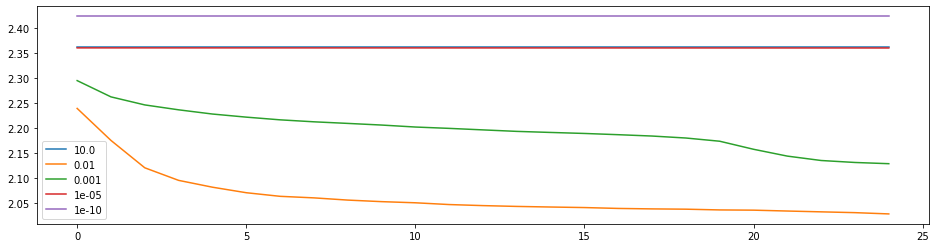

In [ ]:
fig = plt.figure(figsize=(16, 4))

for i in voc_loss_train.keys():
    plt.plot(voc_loss_train[i], label=f'{i}')


plt.legend()
plt.show()

## Влияние метода оптимизации градиентного спуска

![picture](https://drive.google.com/uc?export=view&id=1wYGptX72S3sB4K21ktZzbqojHjssZ0xP)

#### Momentum
Вместо того, чтобы использовать только градиент текущего шага, мы будем накапливать импульс градиента прошлых шагов для определения направления движения. 
В связи со стохастической природой, обновления градиента происходят "зигзагообразно", с помощью момента мы усиливаем движение вдоль основного направления. На практике коэффициент у момента инициализируется на уровне 0,5 и постепенно увеличивается до 0,9 в течение нескольких эпох. 
  
#### RMSProp (Root Mean Square Propogation)   
Мы обновляяем меньше веса, которые слишком часто обновляются, и будем использовать усреднённый по истории квадрат градиента.

#### Adam (Adaptive moment estimation)
Cочетает в себе и идею накопления движения и идею более слабого обновления весов для типичных признаков

In [ ]:
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.001)

In [ ]:
def batch_train(model, x, y):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    model.zero_grad()
    loss.backward()
    #    with torch.no_grad():
    #    for param in model.parameters():
    #        param -= learning_rate * param.grad
    optimizer.step()
    return(loss.item())

In [ ]:
n_epochs = 10
batch_size = 1000


model_2.apply(init_weights)
loss_train_sgd = []

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001, momentum=0.0)

for epoch in range(n_epochs):

    permutation = torch.randperm(x_train_norm.size()[0])

    for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_norm[indices], y_train[indices]
        batch_train(model_2, batch_x, batch_y)

    y_test_pred = model_2(x_test_norm)
    loss_train = loss_fn(y_test_pred, y_test).detach().numpy()
    print(f'Epoch: {epoch} loss {loss_train}')
    loss_train_sgd = np.append(loss_train_sgd, loss_train)

    
model_2.apply(init_weights)
loss_train_sgd_moment = []

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9)

for epoch in range(n_epochs):

    permutation = torch.randperm(x_train_norm.size()[0])

    for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_norm[indices], y_train[indices]
        batch_train(model_2, batch_x, batch_y)

    y_test_pred = model_2(x_test_norm)
    loss_train = loss_fn(y_test_pred, y_test).detach().numpy()
    print(f'Epoch: {epoch} loss {loss_train}')
    loss_train_sgd_moment = np.append(loss_train_sgd_moment, loss_train)
    
    

model_2.apply(init_weights)
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)
loss_train_adam = []


for epoch in range(n_epochs):

    permutation = torch.randperm(x_train_norm.size()[0])

    for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_norm[indices], y_train[indices]
        batch_train(model_2, batch_x, batch_y)

    y_test_pred = model_2(x_test_norm)
    loss_train = loss_fn(y_test_pred, y_test).detach().numpy()
    print(f'Epoch: {epoch} loss {loss_train}')
    loss_train_adam = np.append(loss_train_all, loss_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until
 22%|██▏       | 13/60 [00:00<00:00, 120.80it/s]

Epoch: 0 loss 2.3039016723632812


 22%|██▏       | 13/60 [00:00<00:00, 121.02it/s]

Epoch: 1 loss 2.303736925125122


 20%|██        | 12/60 [00:00<00:00, 118.19it/s]

Epoch: 2 loss 2.303563356399536


 20%|██        | 12/60 [00:00<00:00, 110.44it/s]

Epoch: 3 loss 2.303394079208374


 20%|██        | 12/60 [00:00<00:00, 114.35it/s]

Epoch: 4 loss 2.303218126296997


 20%|██        | 12/60 [00:00<00:00, 118.08it/s]

Epoch: 5 loss 2.3030521869659424


 22%|██▏       | 13/60 [00:00<00:00, 122.12it/s]

Epoch: 6 loss 2.3028812408447266


 22%|██▏       | 13/60 [00:00<00:00, 122.53it/s]

Epoch: 7 loss 2.302708864212036


 20%|██        | 12/60 [00:00<00:00, 116.97it/s]

Epoch: 8 loss 2.3025355339050293


 20%|██        | 12/60 [00:00<00:00, 112.51it/s]

Epoch: 9 loss 2.3023579120635986


 22%|██▏       | 13/60 [00:00<00:00, 120.80it/s]

Epoch: 0 loss 2.3060481548309326


 20%|██        | 12/60 [00:00<00:00, 113.57it/s]

Epoch: 1 loss 2.303842782974243


 20%|██        | 12/60 [00:00<00:00, 118.05it/s]

Epoch: 2 loss 2.301632881164551


 20%|██        | 12/60 [00:00<00:00, 116.23it/s]

Epoch: 3 loss 2.2994818687438965


 20%|██        | 12/60 [00:00<00:00, 118.39it/s]

Epoch: 4 loss 2.2974321842193604


 22%|██▏       | 13/60 [00:00<00:00, 120.77it/s]

Epoch: 5 loss 2.2954587936401367


 22%|██▏       | 13/60 [00:00<00:00, 122.20it/s]

Epoch: 6 loss 2.2935292720794678


 20%|██        | 12/60 [00:00<00:00, 115.40it/s]

Epoch: 7 loss 2.291651725769043


 20%|██        | 12/60 [00:00<00:00, 118.70it/s]

Epoch: 8 loss 2.2898142337799072


 18%|█▊        | 11/60 [00:00<00:00, 106.44it/s]

Epoch: 9 loss 2.2880096435546875


 17%|█▋        | 10/60 [00:00<00:00, 93.68it/s]

Epoch: 0 loss 2.148003101348877


 17%|█▋        | 10/60 [00:00<00:00, 92.78it/s]

Epoch: 1 loss 2.0741004943847656


 15%|█▌        | 9/60 [00:00<00:00, 89.93it/s]

Epoch: 2 loss 2.0084147453308105


 15%|█▌        | 9/60 [00:00<00:00, 83.55it/s]

Epoch: 3 loss 1.9518235921859741


 15%|█▌        | 9/60 [00:00<00:00, 81.69it/s]

Epoch: 4 loss 1.9041955471038818


 13%|█▎        | 8/60 [00:00<00:00, 74.71it/s]

Epoch: 5 loss 1.8642607927322388


 13%|█▎        | 8/60 [00:00<00:00, 74.03it/s]

Epoch: 6 loss 1.8296164274215698


 12%|█▏        | 7/60 [00:00<00:00, 67.06it/s]

Epoch: 7 loss 1.7974636554718018


 12%|█▏        | 7/60 [00:00<00:00, 64.94it/s]

Epoch: 8 loss 1.7666634321212769


100%|██████████| 60/60 [00:00<00:00, 65.13it/s]


Epoch: 9 loss 1.7418442964553833


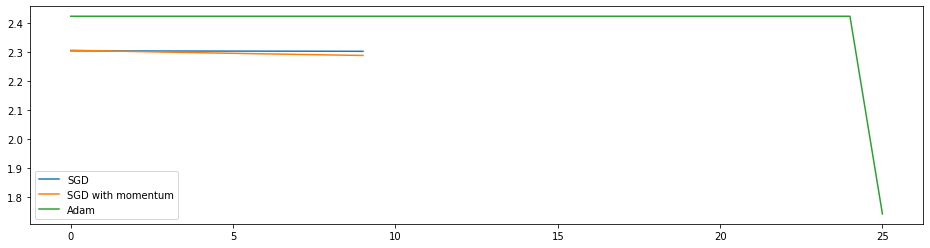

In [ ]:
fig = plt.figure(figsize=(16, 4))

plt.plot(loss_train_sgd, label='SGD')
plt.plot(loss_train_sgd_moment, label='SGD with momentum')
plt.plot(loss_train_adam, label='Adam')

plt.legend()
plt.show()

# Ссылки
- [Курс "Deep learning на пальцах", лекция 4](https://youtu.be/tnrbx7V9RbA)
- [Статья: Оптимизация градиентного спуска](http://ruder.io/optimizing-gradient-descent/)
- [Статья: Методы оптимизации нейронных сетей](https://habr.com/ru/post/318970/)